# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [160]:
# Loading all the libraries

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt


## Load data

In [161]:
data_calls=pd.read_csv('/datasets/megaline_calls.csv', sep=',') 
data_internet=pd.read_csv('/datasets/megaline_internet.csv', sep=',') 
data_mesgs=pd.read_csv('/datasets/megaline_messages.csv',sep=',') 
data_plan=pd.read_csv('/datasets/megaline_plans.csv',sep=',')
data_users=pd.read_csv('/datasets/megaline_users.csv',sep=',')# Load the data files into different DataFrames



## Prepare the data

In [162]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [163]:
data_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [164]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [165]:
data_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [166]:
data_mesgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [167]:
data_mesgs.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [168]:
data_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [169]:
data_plan.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [170]:
data_plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [171]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [172]:
data_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Plans

In [173]:
data_plan.info()# Print the general/summary information about the plans' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [174]:
data_plan# Print a sample of data for plans



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We don 't need to fix here anything, we see two our plans surf and ultimate with all data about it.

## Fix data

## Enrich data

## Users

In [175]:
data_users.info()# Print the general/summary information about the users' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [176]:
data_users.head()# Print a sample of data for users



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


We have whole column 'city' without NaN and it's great we will use it for our Hypotheses about regions. We have the column 'reg_date' and churn_date with object type, let's change it to datetime. We don't need the column churn_date so we will left our missing values as it is

### Fix Data

In [177]:
data_users.duplicated().sum()

0

In [178]:
data_users['reg_date']=pd.to_datetime(data_users['reg_date'])#we will transform reg_date to datetime type

In [179]:
data_users['churn_date']=pd.to_datetime(data_users['churn_date'])#we will transform churn_date to datetime type

### Enrich Data

In [180]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Calls

In [181]:
data_calls.info()# Print the general/summary information about the calls' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [182]:
data_calls.head(20)# Print a sample of data for calls



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [183]:
data_calls['user_id'].nunique()

481

We have only 481 unique user_id, so it's seems that we have users without calls.Also call_date column with object type we will change it to datetime. And we will round up our duration for integer minutes.

### Fix data

In [184]:
data_calls.duplicated().sum()

0

In [185]:
data_calls['call_date']=pd.to_datetime(data_calls['call_date'])#we will transform call_date to datetime type

In [186]:
data_calls['duration']=np.ceil(data_calls['duration'])

In [187]:
data_calls=data_calls.astype({'duration':int}) 
data_calls['duration'].head(20)

0      9
1     14
2     15
3      6
4      5
5      3
6      6
7     15
8      6
9      5
10     5
11    13
12     2
13     4
14    10
15     6
16    11
17     1
18    16
19     0
Name: duration, dtype: int64

### Enrich data

Let's add column month for each row.

In [188]:
data_calls['month']=pd.to_datetime(data_calls['call_date']).dt.month

In [189]:
data_calls['month']

0         12
1         12
2         12
3         12
4         12
          ..
137730    11
137731    10
137732     9
137733    10
137734    12
Name: month, Length: 137735, dtype: int64

In [190]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


## Messages

In [191]:
data_mesgs.info()# Print the general/summary information about the messages' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [192]:
data_mesgs.head()# Print a sample of data for messages


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [193]:
data_mesgs['user_id'].nunique()

402

Here we also see that we have users that don't use the messeges.

### Fix data

Change type of column message_date

In [194]:
data_mesgs.duplicated().sum()

0

In [195]:
data_mesgs['message_date']=pd.to_datetime(data_mesgs['message_date'])#we will transform mesgs_date to datetime type

### Enrich data

Let's add column month for each row.

In [196]:
data_mesgs['month']=pd.to_datetime(data_mesgs['message_date']).dt.month
data_mesgs['month']

0        12
1        12
2        12
3        12
4        12
         ..
76046    12
76047    12
76048    12
76049    12
76050    12
Name: month, Length: 76051, dtype: int64

In [197]:
data_mesgs['month'].unique()


array([12, 11,  8, 10,  9,  6,  7,  5,  4,  3,  2,  1])

In [198]:
data_mesgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


## Internet

In [199]:
data_internet.duplicated().sum()

0

In [200]:
data_internet.info()# Print the general/summary information about the internet DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [201]:
data_internet.head()# Print a sample of data for the internet traffic



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [202]:
data_internet['user_id'].nunique()

489

Again in this table we don't have all our users.

### Fix data

Session_date will be datetime type

In [203]:
data_internet['session_date']=pd.to_datetime(data_internet['session_date'])#we will transform mesgs_date to datetime type

### Enrich data

Let's add column month for each row.

In [204]:
data_internet['month']=pd.to_datetime(data_internet['session_date']).dt.month
data_internet['month']

0         12
1         12
2         12
3         12
4         12
          ..
104820    10
104821    12
104822     9
104823    12
104824    12
Name: month, Length: 104825, dtype: int64

In [205]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [206]:
data_plan# Print out the plan conditions and make sure they are clear for you



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now, as the data is clean,we will group data per user per month.

In [207]:
# Calculate the number of calls made by each user per month. Save the result.
call_per_month=data_calls.groupby(['user_id', 'month'])['id'].count().reset_index()
call_per_month=pd.DataFrame(call_per_month) 
call_per_month

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [208]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes=data_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes=pd.DataFrame(minutes)
minutes

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [209]:
msgs_per_month=data_mesgs.groupby(['user_id','month'])['id'].count().reset_index()# Calculate the number of messages sent by each user per month. Save the result.
msgs_per_month=pd.DataFrame(msgs_per_month)
msgs_per_month

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [210]:
volume=data_internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()# Calculate the volume of internet traffic used by each user per month. Save the result.
volume=pd.DataFrame(volume)
volume

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Now we merge all our data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [211]:
from functools import reduce

In [212]:
data_frames = [call_per_month,minutes, msgs_per_month, volume]
df= reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)

In [213]:
df

,user_id,month,id_x,duration,id_y,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


Let's change names of columns it will make our work easier 

In [214]:
df.columns

Index(['user_id', 'month', 'id_x', 'duration', 'id_y', 'mb_used'], dtype='object')

In [215]:
df=df.rename(columns={'id_x':'calls', 'id_y':'msgs'})
df.columns

Index(['user_id', 'month', 'calls', 'duration', 'msgs', 'mb_used'], dtype='object')

In [216]:
 # Merge the data for calls, minutes, messages, internet based on user_id and month
df

,user_id,month,calls,duration,msgs,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [217]:
plan=pd.DataFrame(data_users['plan'])
plan['user_id']=data_users['user_id']
plan

,plan,user_id
0,ultimate,1000
1,surf,1001
2,surf,1002
3,surf,1003
4,surf,1004
...,...,...
495,surf,1495
496,surf,1496
497,ultimate,1497
498,surf,1498


In [218]:
df= pd.merge(left = df , 
                right = plan, how='inner',on='user_id').fillna(0)# Add the plan information. 
df=df.rename(columns={'plan_y':'plan'})
df

,user_id,month,calls,duration,msgs,mb_used,plan
0,1000,12,16.0,124.0,11.0,1901.47,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,surf
2,1001,9,49.0,315.0,44.0,13314.82,surf
3,1001,10,65.0,393.0,53.0,22330.49,surf
4,1001,11,64.0,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36730.05,ultimate
2289,1349,10,0.0,0.0,76.0,13093.55,surf
2290,1349,11,0.0,0.0,72.0,17128.26,surf
2291,1349,12,0.0,0.0,61.0,13039.91,surf


Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan. 

In [219]:
data_plan

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [220]:
# Calculate the monthly revenue for each user
def revenue(row):
    duration=row['duration']
    msgs=row['msgs']
    mb_used=row['mb_used']
    plan=row['plan']
    cost=0
    if plan=='surf':
        if duration>500:
            extra_min=(duration-500)*0.03
        else:
            extra_min=0
        if msgs>50:
            extra_msgs=(msgs-50)*0.03
        else:
            extra_msgs=0
        if mb_used>15360:
            extra_gb=(mb_used-15360)/1024
            extra_gb=np.ceil(extra_gb)
            extra_int=extra_gb*10 
        else:
            extra_int=0
       
        cost=20+extra_min+extra_msgs+extra_int
            
    elif plan=='ultimate':
       
        if duration>3000:
            extra_min=(duration-3000)*0.01
        else:
            extra_min=0
        if msgs>1000:
            extra_msgs=(msgs-1000)*0.01
        else:
            extra_msgs=0
        if mb_used>30720:
            extra_gb=(mb_used-30720)/1024
            extra_gb=np.ceil(extra_gb)
            extra_int=extra_gb*7 
           
        else:
            extra_int=0
       
        cost=70+extra_min+extra_msgs+extra_int
    return cost


In [221]:
df['revenue']=df.apply(revenue,axis=1)
df

,user_id,month,calls,duration,msgs,mb_used,plan,revenue
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,70.00
1,1001,8,27.0,182.0,30.0,6919.15,surf,20.00
2,1001,9,49.0,315.0,44.0,13314.82,surf,20.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,90.09
4,1001,11,64.0,426.0,36.0,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36730.05,ultimate,112.00
2289,1349,10,0.0,0.0,76.0,13093.55,surf,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,surf,40.66
2291,1349,12,0.0,0.0,61.0,13039.91,surf,20.33


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   int64  
 1   month     2293 non-null   int64  
 2   calls     2293 non-null   float64
 3   duration  2293 non-null   float64
 4   msgs      2293 non-null   float64
 5   mb_used   2293 non-null   float64
 6   plan      2293 non-null   object 
 7   revenue   2293 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 161.2+ KB


## Study user behaviour

In [223]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2293.0,1246.075883,143.051927,1000.0,1122.00,1245.00,1368.00,1499.00
month,2293.0,9.172700,2.496386,1.0,8.00,10.00,11.00,12.00
calls,2293.0,60.067597,32.402563,0.0,38.00,60.00,79.00,205.00
duration,2293.0,429.283471,236.320077,0.0,265.00,425.00,572.00,1510.00
msgs,2293.0,33.166594,34.070085,0.0,3.00,26.00,51.00,266.00
mb_used,2293.0,16764.397606,7967.237527,0.0,12235.76,16830.64,20999.84,70931.59
revenue,2293.0,64.351147,46.624945,20.0,23.48,70.00,70.00,590.37


### Calls

In [224]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

In [225]:
df.groupby(['plan', 'month'])['duration'].agg(['mean','median']).reset_index()

,plan,month,mean,median
0,surf,1,203.000000,203.0
1,surf,2,297.000000,254.0
2,surf,3,330.000000,334.0
3,surf,4,351.540000,339.5
4,surf,5,399.584416,415.0
5,surf,6,431.298969,423.0
6,surf,7,449.983471,454.0
7,surf,8,410.111111,392.0
8,surf,9,414.226804,426.0
9,surf,10,429.729958,432.0


array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

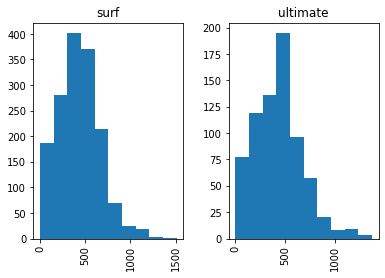

In [226]:
df.duration.hist(by=df['plan'])

In [227]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

df['duration']=np.ceil(df['duration'])

In [228]:
df['duration'].astype(int)

0       124
1       182
2       315
3       393
4       426
       ... 
2288      0
2289      0
2290      0
2291      0
2292      0
Name: duration, Length: 2293, dtype: int64

In [229]:
df.groupby(['plan', 'month'])['duration'].agg(['mean','median']).reset_index()

,plan,month,mean,median
0,surf,1,203.000000,203.0
1,surf,2,297.000000,254.0
2,surf,3,330.000000,334.0
3,surf,4,351.540000,339.5
4,surf,5,399.584416,415.0
5,surf,6,431.298969,423.0
6,surf,7,449.983471,454.0
7,surf,8,410.111111,392.0
8,surf,9,414.226804,426.0
9,surf,10,429.729958,432.0


In [230]:
df.groupby(['plan'])['duration'].agg(['mean','median']).reset_index()

,plan,mean,median
0,surf,428.749523,425.0
1,ultimate,430.450000,424.0


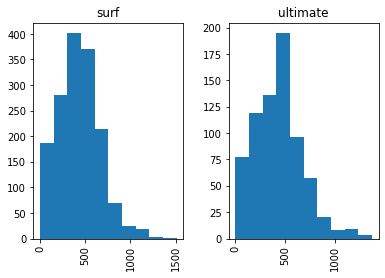

In [231]:
df.duration.hist(by=df['plan']);

In general in this year we have the same median and almost the same mean for plans.

In [232]:
import seaborn as sns

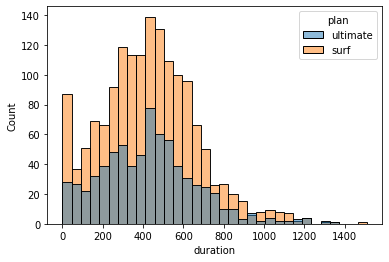

In [233]:
sns.histplot(df,x='duration',hue='plan');

In [234]:
# Calculate the mean and the variance of the monthly call duration



In [235]:
df.groupby(['plan','month'])['duration'].var()

plan      month
surf      1        15842.000000
          2        52226.500000
          3        35809.363636
          4        50866.743265
          5        59754.219754
          6        45592.628436
          7        61005.099725
          8        54344.645963
          9        46595.958656
          10       52278.664056
          11       51607.021602
          12       63629.518918
ultimate  1        16572.333333
          2        76889.476190
          3        61984.931818
          4        34888.928571
          5        43841.046798
          6        42503.563367
          7        72563.374635
          8        53645.506640
          9        57070.464569
          10       54261.910512
          11       60593.222847
          12       62503.783400
Name: duration, dtype: float64

In [236]:
df.groupby(['plan', 'month'])['duration'].var().reset_index()

,plan,month,duration
0,surf,1,15842.000000
1,surf,2,52226.500000
2,surf,3,35809.363636
3,surf,4,50866.743265
4,surf,5,59754.219754
5,surf,6,45592.628436
6,surf,7,61005.099725
7,surf,8,54344.645963
8,surf,9,46595.958656
9,surf,10,52278.664056


In [237]:
cv=df.duration.std()/df.duration.mean()
cv

0.5504988956676883

In [238]:
df.groupby(['plan','month'])['duration'].std()/df.groupby(['plan', 'month'])['duration'].mean()

plan      month
surf      1        0.620025
          2        0.769465
          3        0.573435
          4        0.641567
          5        0.611752
          6        0.495073
          7        0.548892
          8        0.568430
          9        0.521118
          10       0.532067
          11       0.536637
          12       0.532354
ultimate  1        0.665290
          2        0.687819
          3        0.818300
          4        0.554496
          5        0.515414
          6        0.555762
          7        0.630757
          8        0.549584
          9        0.546029
          10       0.516803
          11       0.552917
          12       0.544561
Name: duration, dtype: float64

In [239]:
df.groupby(['plan','month'])['duration'].std()/df.groupby(['plan'])['duration'].mean()

plan      month
surf      1        0.293563
          2        0.533018
          3        0.441362
          4        0.526033
          5        0.570139
          6        0.498016
          7        0.576076
          8        0.543719
          9        0.503466
          10       0.533284
          11       0.529847
          12       0.588336
ultimate  1        0.299067
          2        0.644185
          3        0.578389
          4        0.433931
          5        0.486427
          6        0.478950
          7        0.625801
          8        0.538076
          9        0.554987
          10       0.541159
          11       0.571859
          12       0.580805
Name: duration, dtype: float64

In [240]:
import matplotlib.pyplot as plt


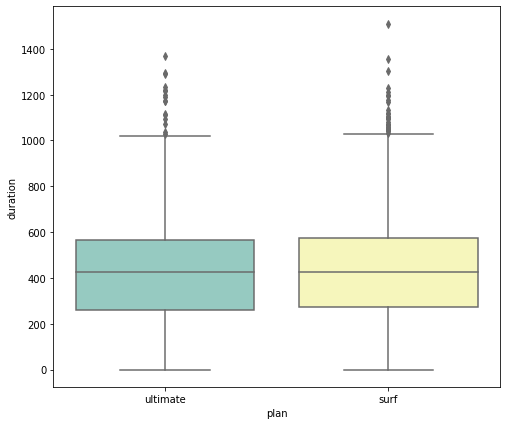

In [241]:
# Plot a boxplot to visualize the distribution of the monthly call duration
fig, ax = plt.subplots(figsize=(8,7))
ax= sns.boxplot( x='plan',y="duration",
                 data=df, palette="Set3")


We have the similar behaviour of user of both plans. We can see in boxplot that we have standart deviation for surf and ultimate plans, and also variance. 

### Messages

In [242]:
df.msgs.describe()

count    2293.000000
mean       33.166594
std        34.070085
min         0.000000
25%         3.000000
50%        26.000000
75%        51.000000
max       266.000000
Name: msgs, dtype: float64

In [243]:
df.groupby(['plan', 'month'])['msgs'].agg(['mean','median']).reset_index()# Compare the number of messages users of each plan tend to send each month



,plan,month,mean,median
0,surf,1,10.500000,10.5
1,surf,2,12.000000,3.0
2,surf,3,15.260870,7.0
3,surf,4,17.400000,10.0
4,surf,5,24.012987,15.0
5,surf,6,25.298969,15.0
6,surf,7,27.033058,20.0
7,surf,8,28.777778,20.0
8,surf,9,30.762887,22.5
9,surf,10,33.839662,26.0


In [244]:
df.groupby(['plan','month'])['msgs'].var()

plan      month
surf      1         220.500000
          2         386.000000
          3         346.565217
          4         501.591837
          5         847.197198
          6         914.920103
          7         923.915565
          8        1029.515528
          9        1003.829496
          10       1275.465708
          11       1065.344034
          12       1458.158612
ultimate  1         313.666667
          2         478.285714
          3         654.386364
          4         544.147619
          5        1297.310345
          6         857.620722
          7         960.488019
          8        1196.367404
          9        1050.918331
          10       1221.106289
          11       1232.669166
          12       1549.419956
Name: msgs, dtype: float64

In [245]:
df.groupby(['plan'])['msgs'].agg(['mean','median']).reset_index()

,plan,mean,median
0,surf,31.159568,24.0
1,ultimate,37.551389,30.0


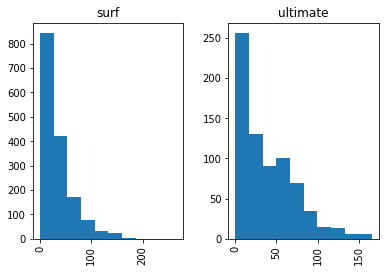

In [246]:
df.msgs.hist(by=df['plan']);

<AxesSubplot:xlabel='msgs', ylabel='Count'>

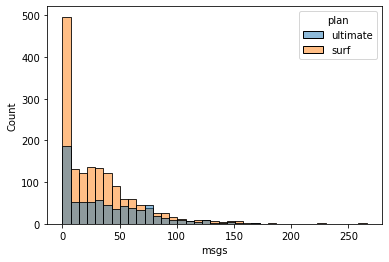

In [247]:
sns.histplot(df,x='msgs',hue='plan')

In [248]:
df.groupby(['plan','month'])['msgs'].std()/df.groupby(['plan','month'])['msgs'].mean()

plan      month
surf      1        1.414214
          2        1.637240
          3        1.219869
          4        1.287141
          5        1.212121
          6        1.195608
          7        1.124400
          8        1.114960
          9        1.029919
          10       1.055379
          11       1.007857
          12       0.989254
ultimate  1        1.142622
          2        1.013829
          3        1.263258
          4        1.058027
          5        1.121942
          6        0.998116
          7        0.943992
          8        0.898897
          9        0.855458
          10       0.885936
          11       0.909421
          12       0.874597
Name: msgs, dtype: float64

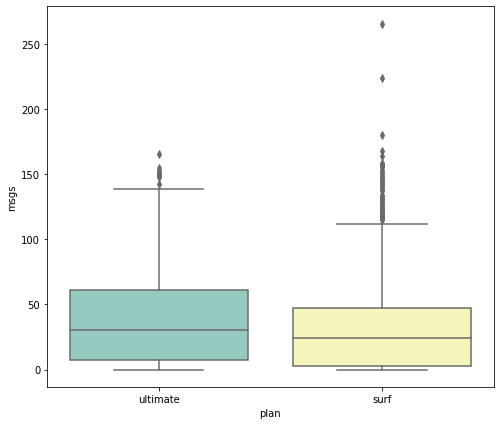

In [249]:
fig, ax = plt.subplots(figsize=(8,7))
ax= sns.boxplot( x='plan',y="msgs",
                 data=df, palette="Set3")

We see on our boxplot that median is close to each other. Ultimate has a bigger varience, but surf plan has more outliers, and has a lot, we can see it in numbers of mean31 and median24.

### Internet

In [250]:
df.groupby(['plan', 'month'])['mb_used'].agg(['mean','median']).reset_index()

,plan,month,mean,median
0,surf,1,4874.860000,4874.860
1,surf,2,12178.843333,11828.250
2,surf,3,13345.440000,13867.940
3,surf,4,11984.203000,11814.100
4,surf,5,13936.354935,13953.250
5,surf,6,15301.529175,15479.970
6,surf,7,16783.600579,16876.570
7,surf,8,16795.331358,16879.510
8,surf,9,16591.431289,16968.935
9,surf,10,17311.335063,17460.790


In [251]:
df.groupby(['plan'])['mb_used'].agg(['mean','median']).reset_index()

,plan,mean,median
0,surf,16558.283490,16829.31
1,ultimate,17214.699694,16858.34


In [252]:
df.mb_used.describe()

count     2293.000000
mean     16764.397606
std       7967.237527
min          0.000000
25%      12235.760000
50%      16830.640000
75%      20999.840000
max      70931.590000
Name: mb_used, dtype: float64

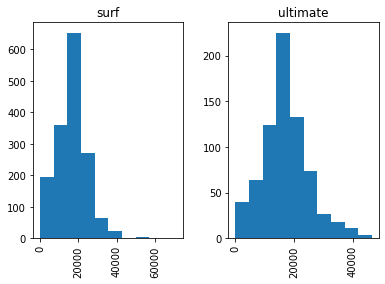

In [253]:
df.mb_used.hist(by=df['plan']);

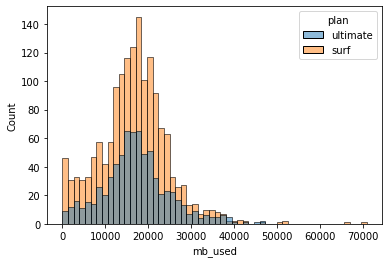

In [254]:
sns.histplot(df,x='mb_used',hue='plan');

In [255]:
df.mb_used.var()

63476873.81347372

In [256]:
df.groupby(['plan','month'])['mb_used'].var()

plan      month
surf      1        1.823995e+07
          2        4.367296e+07
          3        6.824556e+07
          4        5.904494e+07
          5        6.147653e+07
          6        4.913339e+07
          7        6.468655e+07
          8        7.463649e+07
          9        5.131665e+07
          10       6.252794e+07
          11       5.717547e+07
          12       7.214741e+07
ultimate  1        1.639471e+07
          2        3.764910e+07
          3        1.403392e+08
          4        8.842861e+07
          5        5.679012e+07
          6        7.201453e+07
          7        6.841921e+07
          8        6.044708e+07
          9        4.933904e+07
          10       5.699528e+07
          11       5.758948e+07
          12       6.188130e+07
Name: mb_used, dtype: float64

In [257]:
df.groupby(['plan','month'])['mb_used'].std()/df.groupby(['plan','month'])['mb_used'].mean()

plan      month
surf      1        0.876092
          2        0.542626
          3        0.619019
          4        0.641183
          5        0.562607
          6        0.458093
          7        0.479206
          8        0.514383
          9        0.431763
          10       0.456779
          11       0.462778
          12       0.468439
ultimate  1        0.585282
          2        0.358220
          3        0.646589
          4        0.583293
          5        0.453303
          6        0.553278
          7        0.506070
          8        0.436424
          9        0.413920
          10       0.428644
          11       0.445516
          12       0.429317
Name: mb_used, dtype: float64

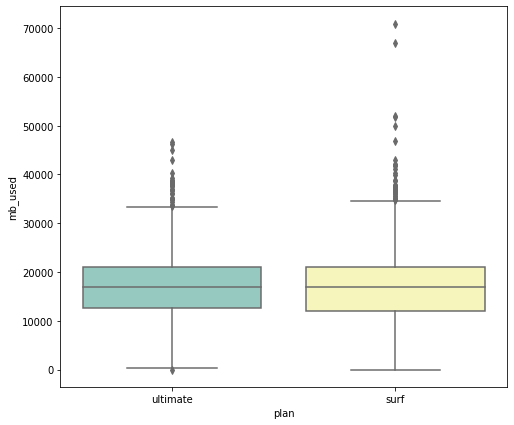

In [258]:
fig, ax = plt.subplots(figsize=(8,7))
ax= sns.boxplot( x='plan',y="mb_used",
                 data=df, palette="Set3")

So here we see the same picture with calls. Almost equel medians, we have standart deviation now,and the same variance for year,we have slightly different numbers every month.

## Revenue

In [259]:
df.revenue.describe()

count    2293.000000
mean       64.351147
std        46.624945
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: revenue, dtype: float64

In [260]:
df.groupby(['plan', 'month'])['revenue'].agg(['mean','median']).reset_index()

,plan,month,mean,median
0,surf,1,20.000000,20.000
1,surf,2,34.396667,29.570
2,surf,3,45.941304,20.000
3,surf,4,40.710600,20.000
4,surf,5,47.628182,21.740
5,surf,6,49.276289,30.150
6,surf,7,62.674050,40.330
7,surf,8,63.931173,41.980
8,surf,9,58.271495,40.045
9,surf,10,65.421224,50.000


In [261]:
df.groupby(['plan', 'month'])['revenue'].var()

plan      month
surf      1           0.000000
          2         428.276100
          3        1512.023512
          4        1198.958402
          5        1967.540055
          6        1988.914046
          7        2943.388409
          8        3587.494901
          9        2260.644980
          10       3198.242612
          11       2494.182230
          12       4604.410868
ultimate  1           0.000000
          2           0.000000
          3         145.515152
          4         120.400000
          5          15.206897
          6          75.018501
          7         104.472238
          8         154.808451
          9          75.939945
          10        169.606918
          11         94.668416
          12        212.861192
Name: revenue, dtype: float64

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

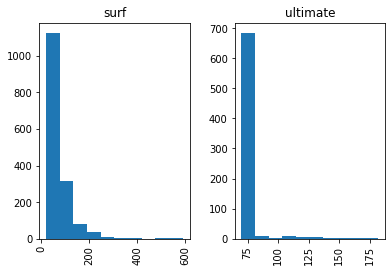

In [262]:
df.revenue.hist(by=df['plan'])

<AxesSubplot:xlabel='revenue', ylabel='Count'>

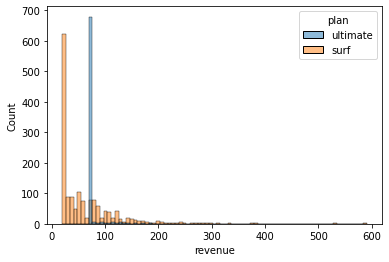

In [263]:
sns.histplot(df,x='revenue',hue='plan')

In [264]:
df.groupby(['plan'])['revenue'].agg(['mean','median']).reset_index()

,plan,mean,median
0,surf,60.706408,40.36
1,ultimate,72.313889,70.00


In [265]:
df.groupby(['plan','month'])['revenue'].std()/df.groupby(['plan', 'month'])['revenue'].mean()

plan      month
surf      1        0.000000
          2        0.601652
          3        0.846401
          4        0.850540
          5        0.931318
          6        0.905045
          7        0.865637
          8        0.936878
          9        0.815943
          10       0.864444
          11       0.861002
          12       0.961716
ultimate  1        0.000000
          2        0.000000
          3        0.161558
          4        0.150311
          5        0.055138
          6        0.120904
          7        0.142161
          8        0.170771
          9        0.120974
          10       0.180101
          11       0.135685
          12       0.199065
Name: revenue, dtype: float64

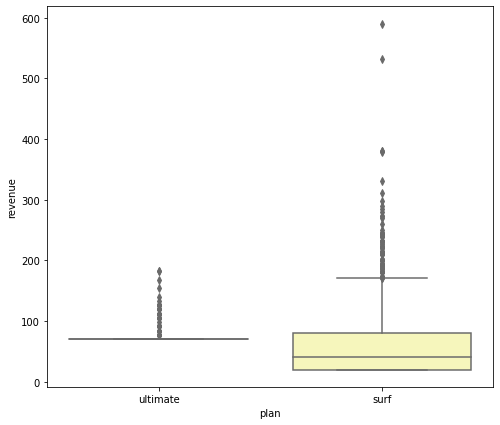

In [266]:
fig, ax = plt.subplots(figsize=(8,7))
ax= sns.boxplot( x='plan',y="revenue",
                 data=df, palette="Set3")

So we have small varience in ultimate plan, it says that all numbers are close to each other. With surf plan the other story we have variance and median is less then median of ultimate, and also we have bigger outliers.

## Test statistical hypotheses

Our first null hypothesis will be : average revenue from users of the Ultimate and Surf calling plans are equel. We will check it with ttest

In [267]:
df.groupby(['plan'])['revenue'].median()

plan
surf        40.36
ultimate    70.00
Name: revenue, dtype: float64

In [268]:
df.groupby(['plan'])['revenue'].mean()

plan
surf        60.706408
ultimate    72.313889
Name: revenue, dtype: float64

In [269]:
# Test the hypotheses

surf=df.query('plan=="surf"')
ultimate=df.query('plan=="ultimate"')

In [270]:
surf

,user_id,month,calls,duration,msgs,mb_used,plan,revenue
1,1001,8,27.0,182.0,30.0,6919.15,surf,20.00
2,1001,9,49.0,315.0,44.0,13314.82,surf,20.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,90.09
4,1001,11,64.0,426.0,36.0,18504.30,surf,60.00
5,1001,12,56.0,412.0,44.0,19369.18,surf,60.00
...,...,...,...,...,...,...,...,...
2285,1194,11,0.0,0.0,62.0,42866.10,surf,290.36
2286,1194,12,0.0,0.0,56.0,31088.49,surf,180.18
2289,1349,10,0.0,0.0,76.0,13093.55,surf,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,surf,40.66


In [271]:
ultimate

,user_id,month,calls,duration,msgs,mb_used,plan,revenue
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,70.0
19,1006,11,2.0,10.0,15.0,2068.37,ultimate,70.0
20,1006,12,9.0,59.0,139.0,32118.82,ultimate,84.0
26,1008,10,71.0,476.0,21.0,17106.99,ultimate,70.0
27,1008,11,63.0,446.0,37.0,23676.72,ultimate,70.0
...,...,...,...,...,...,...,...,...
2231,1493,12,65.0,473.0,0.0,15289.09,ultimate,70.0
2247,1497,12,54.0,300.0,50.0,11106.55,ultimate,70.0
2287,1204,11,0.0,0.0,42.0,21346.95,ultimate,70.0
2288,1204,12,0.0,0.0,78.0,36730.05,ultimate,112.0


In [272]:
sample1=surf['revenue']
sample2=ultimate['revenue']

In [273]:
sample1

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2285    290.36
2286    180.18
2289     20.78
2290     40.66
2291     20.33
Name: revenue, Length: 1573, dtype: float64

In [274]:
sample2

0        70.0
19       70.0
20       84.0
26       70.0
27       70.0
        ...  
2231     70.0
2247     70.0
2287     70.0
2288    112.0
2292     70.0
Name: revenue, Length: 720, dtype: float64

In [275]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-5.568949166552807, pvalue=2.862674510698644e-08)

In [276]:
stats.ttest_ind(sample1, sample2).statistic

-5.568949166552807

In [277]:
p_value=stats.ttest_ind(sample1, sample2).pvalue
p_value

2.862674510698644e-08

In [278]:
p_value=p_value
alpha=0.05
if p_value<alpha:
    print('Reject H0: average of sample 1 is not equal to average of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same")

Reject H0: average of sample 1 is not equal to average of sample 2


Our second null hypothese is: average of revenue from users in the NY-NJ area is the same as users from the other regions.

In [279]:
data_users['city'].sort_values().unique() 

array(['Albany-Schenectady-Troy, NY MSA', 'Albuquerque, NM MSA',
       'Atlanta-Sandy Springs-Roswell, GA MSA',
       'Austin-Round Rock-Georgetown, TX MSA', 'Bakersfield, CA MSA',
       'Baltimore-Columbia-Towson, MD MSA', 'Baton Rouge, LA MSA',
       'Birmingham-Hoover, AL MSA', 'Boston-Cambridge-Newton, MA-NH MSA',
       'Bridgeport-Stamford-Norwalk, CT MSA',
       'Buffalo-Cheektowaga, NY MSA', 'Cape Coral-Fort Myers, FL MSA',
       'Charleston-North Charleston, SC MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Cincinnati, OH-KY-IN MSA', 'Cleveland-Elyria, OH MSA',
       'Colorado Springs, CO MSA', 'Columbia, SC MSA', 'Columbus, OH MSA',
       'Dallas-Fort Worth-Arlington, TX MSA', 'Dayton-Kettering, OH MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Detroit-Warren-Dearborn, MI MSA', 'El Paso, TX MSA',
       'Fresno, CA MSA', 'Grand Rapids-Kentwood, MI MSA',
       'Greensboro-High Point, NC MSA',
    


we see that we don't have some duplicate for our region and it's name New York-Newark-Jersey City, NY-NJ-PA MSA. We have 80 row with region NY/NJ, let's create DataFrame with this region, and with all others.

In [280]:
data_users['city'].value_counts()#there are 80 row with this region

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Greensboro-High Point, NC MSA                       1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Cape Coral-Fort Myers, FL MSA                       1
Albany-Schenectady-Troy, NY MSA                     1
Raleigh-Cary, NC MSA                                1
Name: city, Length: 73, dtype: int64

In [281]:
NY_NJ=data_users[data_users['city']== 'New York-Newark-Jersey City, NY-NJ-PA MSA']
NY_NJ

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaT
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaT
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT
...,...,...,...,...,...,...,...,...
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaT
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaT
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaT
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT


In [282]:
Not_NY=data_users[data_users['city']!= 'New York-Newark-Jersey City, NY-NJ-PA MSA']
Not_NY

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaT
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT


In [283]:
df_NY_NJ=pd.merge(left = NY_NJ , 
                right = df, how='outer',on='user_id').fillna(0)

In [284]:
region1=df_NY_NJ[df_NY_NJ['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
region1

,user_id,first_name,last_name,age,city,reg_date,plan_x,churn_date,month,calls,duration,msgs,mb_used,plan_y,revenue
0,1014,Edmundo,Simon,61.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25 00:00:00,surf,0,11.0,28.0,163.0,9.0,1175.59,surf,20.00
1,1014,Edmundo,Simon,61.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25 00:00:00,surf,0,12.0,150.0,1114.0,64.0,7792.41,surf,38.84
2,1022,Bo,Snow,73.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20 00:00:00,surf,2018-09-07 00:00:00,5.0,39.0,302.0,0.0,4908.08,surf,20.00
3,1022,Bo,Snow,73.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20 00:00:00,surf,2018-09-07 00:00:00,6.0,76.0,490.0,0.0,23436.48,surf,100.00
4,1022,Bo,Snow,73.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20 00:00:00,surf,2018-09-07 00:00:00,7.0,70.0,475.0,0.0,9933.15,surf,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1498,Scot,Williamson,51.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04 00:00:00,surf,0,8.0,44.0,266.0,0.0,20261.89,surf,70.00
374,1498,Scot,Williamson,51.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04 00:00:00,surf,0,9.0,45.0,363.0,0.0,22827.28,surf,100.00
375,1498,Scot,Williamson,51.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04 00:00:00,surf,0,10.0,46.0,298.0,0.0,20580.76,surf,80.00
376,1498,Scot,Williamson,51.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04 00:00:00,surf,0,11.0,41.0,223.0,0.0,19168.55,surf,60.00


In [285]:
df_region2=pd.merge(left = Not_NY , 
                right = df, how='outer',on='user_id')
region2=df_region2[df_region2['city'].notna()]
region2

,user_id,first_name,last_name,age,city,reg_date,plan_x,churn_date,month,calls,duration,msgs,mb_used,plan_y,revenue
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12.0,16.0,124.0,11.0,1901.47,ultimate,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8.0,27.0,182.0,30.0,6919.15,surf,20.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,9.0,49.0,315.0,44.0,13314.82,surf,20.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,10.0,65.0,393.0,53.0,22330.49,surf,90.09
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,11.0,64.0,426.0,36.0,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,1497,Donte,Barrera,49.0,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,12.0,54.0,300.0,50.0,11106.55,ultimate,70.00
1921,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,9.0,41.0,346.0,0.0,12984.76,surf,20.00
1922,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,10.0,53.0,385.0,0.0,19492.43,surf,70.00
1923,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,11.0,45.0,308.0,0.0,16813.83,surf,40.00


In [286]:
sample_region1=region1['revenue']
sample_region2=region2['revenue']

Now we have two samples for two regions Ny-NJ(sample_region1) and others(sample_regions2), and we see that in region1 we have 378 raws and in region2 we have 1925 and it's exactly 2303, number of raws in our df table with  revenue for each user per month.
Now let's check hypothess.

Our HO: average of revenue from users in the NY-NJ area is the same as users from the other regions

In [287]:
sample_region1.isna().sum()

0

In [288]:
sample_region2.isna().sum()

9

In [289]:
p_value_reg=stats.ttest_ind(sample_region1, sample_region2, nan_policy='omit').pvalue
p_value_reg

0.03746819096556319

In [290]:
stats.ttest_ind(sample_region1, sample_region2,nan_policy='omit').statistic

-2.081835648452469

In [291]:
stats.ttest_ind(sample_region1, sample_region2)

Ttest_indResult(statistic=nan, pvalue=nan)

In [292]:
alpha=0.05
if p_value<alpha:
    print('Reject H0: average of revenue from users in the NY-NJ area is not the same as users from the other regions')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that averages of revenue from users in the NY-NJ area is not the same as users from the other regions")

Reject H0: average of revenue from users in the NY-NJ area is not the same as users from the other regions


## General conclusion
So in the beggining we did data preprocessing with columns types and extracting additional data like month, minotes from duration, and gb from mb.
we explored every section of our plans, messages, calls and internet per user per month. Everywhere there are users who do not use something, or don't send sms or not call.
In revenue we see that per month we have median and mean bigger with ultimate plan,so it's more profitable for us to offer it, and it is also easier for us to predict the behavior of ultimate users since their variance is small.
we formulated two null hypotheses
first:average of plan surf is equal to average of plan ultimate, and we got rejection,the average of revenue for both plans are not the same.
second:average of revenue from users in the NY-NJ area is the same as users from the other regions. and here we got the same result,rejection, we have not equal regions.